In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\Downloads\\Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
from sklearn.preprocessing import LabelEncoder
# Initialize lable encoder
label_encoder = LabelEncoder()

columns_to_encode = ["Gender", "Education Level", "Job Title"]

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               375 non-null    int32  
 2   Education Level      375 non-null    int32  
 3   Job Title            375 non-null    int32  
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), int32(3)
memory usage: 13.3 KB


In [6]:
df.dropna(inplace=True)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns="Salary",axis=1), df["Salary"], test_size=0.30, random_state=40)

In [8]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()

In [9]:
Tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

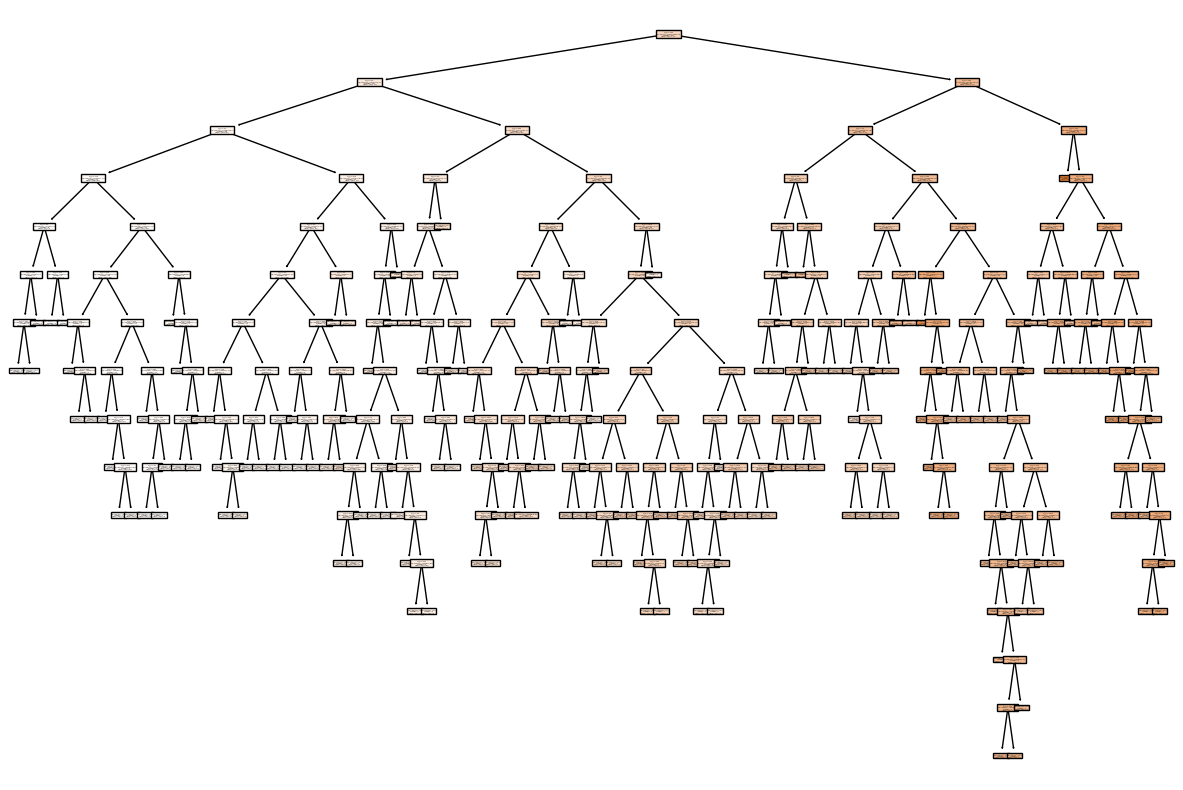

In [10]:
from sklearn import tree
plt.figure(figsize=(15,10))

tree.plot_tree(Tree_model,filled = True)
plt.show()

In [11]:
# Performance Matrix
from sklearn.metrics import r2_score

In [12]:
r2_score_ = r2_score(y_test,Tree_model.predict(x_test))

print("r2_score_ :",r2_score_)

r2_score_ : 0.8989262907469581


In [13]:
# Preprunning
parameter = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3, 4, 5],
    "max_features": [None, "sqrt", "log2"]
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
Tree_model = DecisionTreeRegressor()
cv = GridSearchCV(Tree_model,param_grid=parameter,cv = 5,scoring="neg_mean_squared_error")

In [16]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [17]:
cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

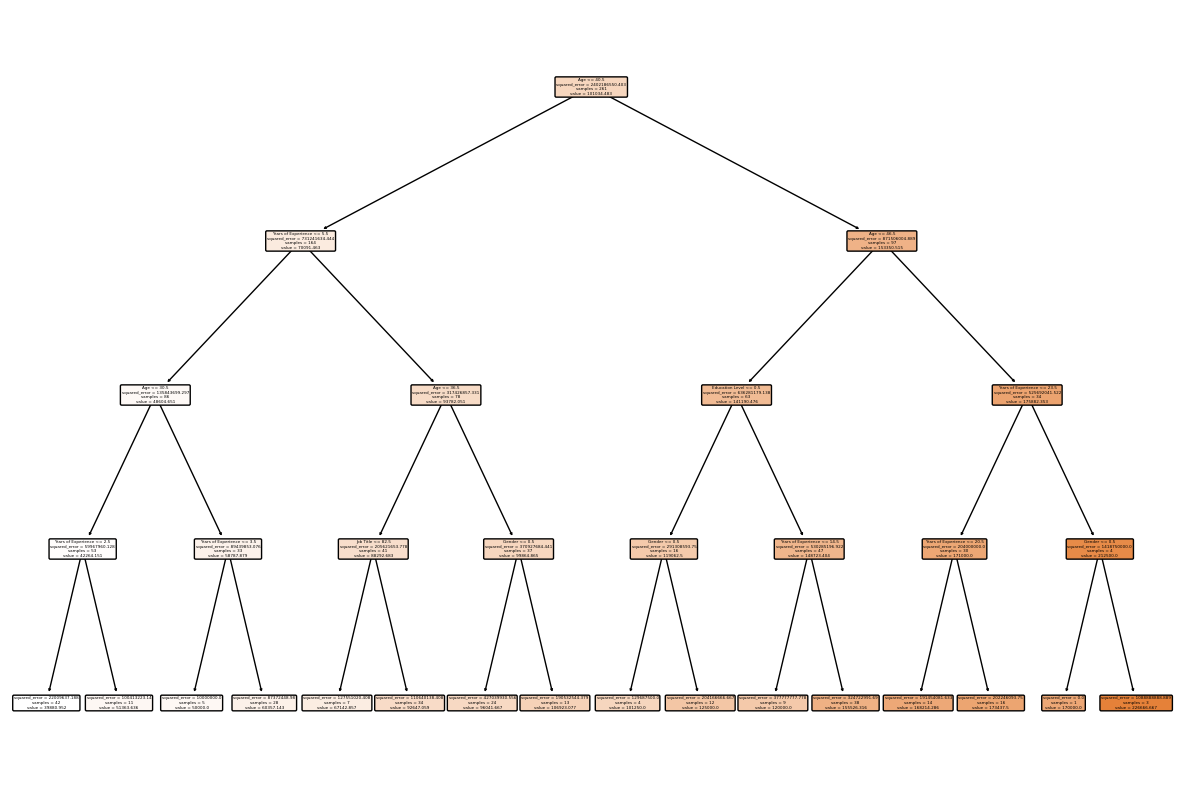

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
best_tree = cv.best_estimator_
plot_tree(best_tree, filled=True, feature_names=x_train.columns, rounded=True)
plt.show()

In [19]:
y_pred = cv.predict(x_test)

In [20]:
# Performance Matrix
from sklearn.metrics import r2_score

In [21]:
r2_score_ = r2_score(y_test,y_pred)

print("r2_score_ :",r2_score_)

r2_score_ : 0.8921030600577983
